## Importation des bibliothèques et chargement des données

In [12]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour afficher tous les résultats
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Chargement des données
df = pd.read_csv('../base/stocksV2.csv', sep=';')
# Affichage des premières lignes
print("Aperçu des premières lignes du dataframe:")
print(df.head())

# Statistiques descriptives
print("\nStatistiques descriptives:")
print(df.describe())


Aperçu des premières lignes du dataframe:
         date id_produit entrepot  niveau_stock
0  01/06/2024     P00001     Lyon            88
1  22/04/2024     P00001    Paris           141
2  25/09/2024     P00002     Lyon           286
3  18/02/2024     P00003    Paris           177
4  13/07/2024     P00003     Lyon            95

Statistiques descriptives:
       niveau_stock
count   1706.000000
mean     148.587925
std       88.078076
min        0.000000
25%       72.000000
50%      147.500000
75%      226.000000
max      299.000000


In [13]:
# Vérification des dimensions du dataframe
print(f"Dimensions du dataframe : {df.shape[0]} lignes x {df.shape[1]} colonnes")

# Vérification des valeurs manquantes
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

# Vérification des types de données
print("\nTypes de données:")
print(df.dtypes)


Dimensions du dataframe : 1706 lignes x 4 colonnes

Nombre de valeurs manquantes par colonne:
date            0
id_produit      0
entrepot        0
niveau_stock    0
dtype: int64

Types de données:
date            object
id_produit      object
entrepot        object
niveau_stock     int64
dtype: object



Distribution des entrepôts:
entrepot
Paris        797
Lyon         576
Marseille    333
Name: count, dtype: int64

Plage de dates:
Date minimale: 01/01/2024
Date maximale: 31/12/2024


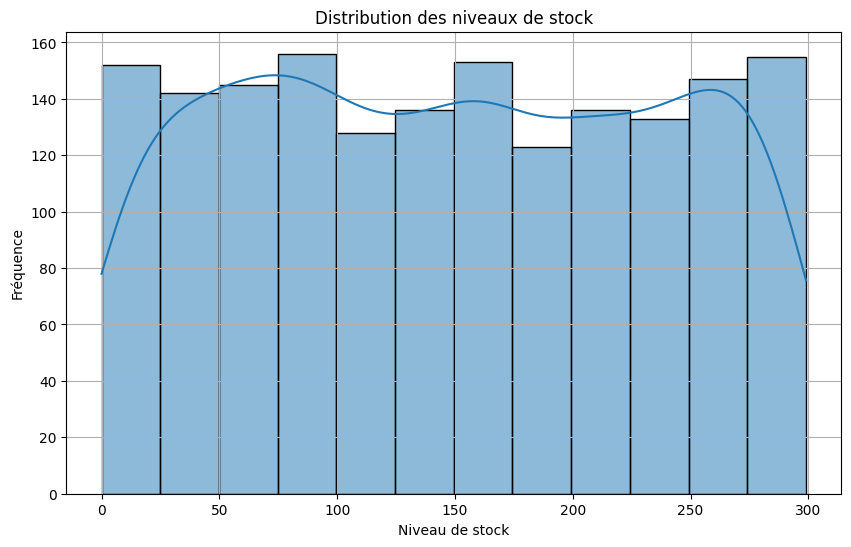

In [14]:

# Analyse de la distribution des entrepôts
print("\nDistribution des entrepôts:")
print(df['entrepot'].value_counts())

# Analyse de la plage de dates
print("\nPlage de dates:")
print(f"Date minimale: {df['date'].min()}")
print(f"Date maximale: {df['date'].max()}")

# Vérification de la distribution des niveaux de stock
plt.figure(figsize=(10, 6))
sns.histplot(df['niveau_stock'], kde=True)
plt.title('Distribution des niveaux de stock')
plt.xlabel('Niveau de stock')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


## Conversion et normalisation des formats de données

In [15]:
# Conversion de la colonne date au format datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Vérification du nouveau format
print("Format de la colonne date après conversion:")
print(df['date'].dtype)
print(df['date'].head())

# Création de colonnes supplémentaires pour l'analyse temporelle
df['annee'] = df['date'].dt.year
df['mois'] = df['date'].dt.month
df['jour'] = df['date'].dt.day

# Affichage du résultat
print("\nDataframe avec les nouvelles colonnes temporelles:")
print(df.head())


Format de la colonne date après conversion:
datetime64[ns]
0   2024-06-01
1   2024-04-22
2   2024-09-25
3   2024-02-18
4   2024-07-13
Name: date, dtype: datetime64[ns]

Dataframe avec les nouvelles colonnes temporelles:
        date id_produit entrepot  niveau_stock  annee  mois  jour
0 2024-06-01     P00001     Lyon            88   2024     6     1
1 2024-04-22     P00001    Paris           141   2024     4    22
2 2024-09-25     P00002     Lyon           286   2024     9    25
3 2024-02-18     P00003    Paris           177   2024     2    18
4 2024-07-13     P00003     Lyon            95   2024     7    13


In [17]:
# Identification des valeurs manquantes
print("Nombre total de valeurs manquantes dans le dataset:", df.isnull().sum().sum())

Nombre total de valeurs manquantes dans le dataset: 0


In [18]:
# Vérification des doublons
print(f"Nombre de lignes avant déduplication: {len(df)}")
duplicates = df.duplicated()
print(f"Nombre de doublons identifiés: {duplicates.sum()}")

Nombre de lignes avant déduplication: 1706
Nombre de doublons identifiés: 0


## Détection et traitement des valeurs aberrantes

In [19]:
# Analyse statistique des niveaux de stock
print("Statistiques descriptives des niveaux de stock:")
print(df['niveau_stock'].describe())

# Méthode des écarts interquartiles (IQR)
Q1 = df['niveau_stock'].quantile(0.25)
Q3 = df['niveau_stock'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nSeuil inférieur pour les valeurs aberrantes: {lower_bound}")
print(f"Seuil supérieur pour les valeurs aberrantes: {upper_bound}")

# Identification des valeurs aberrantes
outliers = df[(df['niveau_stock'] < lower_bound) | (df['niveau_stock'] > upper_bound)]
print(f"\nNombre de valeurs aberrantes identifiées avec la méthode IQR: {len(outliers)}")

if len(outliers) > 0:
    print("\nExemples de valeurs aberrantes:")
    print(outliers.head())

    # Visualisation des valeurs aberrantes
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['niveau_stock'])
    plt.title('Boxplot des niveaux de stock')
    plt.xlabel('Niveau de stock')
    plt.grid(True)
    plt.show()

    # Analyse des valeurs aberrantes par entrepôt
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='entrepot', y='niveau_stock', data=df)
    plt.title('Boxplot des niveaux de stock par entrepôt')
    plt.xlabel('Entrepôt')
    plt.ylabel('Niveau de stock')
    plt.grid(True)
    plt.show()


Statistiques descriptives des niveaux de stock:
count    1706.000000
mean      148.587925
std        88.078076
min         0.000000
25%        72.000000
50%       147.500000
75%       226.000000
max       299.000000
Name: niveau_stock, dtype: float64

Seuil inférieur pour les valeurs aberrantes: -159.0
Seuil supérieur pour les valeurs aberrantes: 457.0

Nombre de valeurs aberrantes identifiées avec la méthode IQR: 0


## Analyse de la distribution des stocks par entrepôt et évolution temporelle

In [22]:
# Création d'une copie du dataframe original pour conserver les données brutes
df_cleaned = df.copy()

# Traitement des valeurs aberrantes
# Option 1: Suppression des valeurs aberrantes
df_without_outliers = df_cleaned[(df_cleaned['niveau_stock'] >= lower_bound) & 
                                (df_cleaned['niveau_stock'] <= upper_bound)]
print(f"\nNombre de lignes après suppression des valeurs aberrantes: {len(df_without_outliers)}")

# Option 2: Écrêtage (capping) des valeurs aberrantes
df_capped = df_cleaned.copy()
df_capped.loc[df_capped['niveau_stock'] < lower_bound, 'niveau_stock'] = lower_bound
df_capped.loc[df_capped['niveau_stock'] > upper_bound, 'niveau_stock'] = upper_bound

print("\nStatistiques après écrêtage des valeurs aberrantes:")
print(df_capped['niveau_stock'].describe())

# Nous choisissons l'option d'écrêtage pour conserver toutes les observations
df_cleaned = df_capped



Nombre de lignes après suppression des valeurs aberrantes: 1706

Statistiques après écrêtage des valeurs aberrantes:
count    1706.000000
mean      148.587925
std        88.078076
min         0.000000
25%        72.000000
50%       147.500000
75%       226.000000
max       299.000000
Name: niveau_stock, dtype: float64


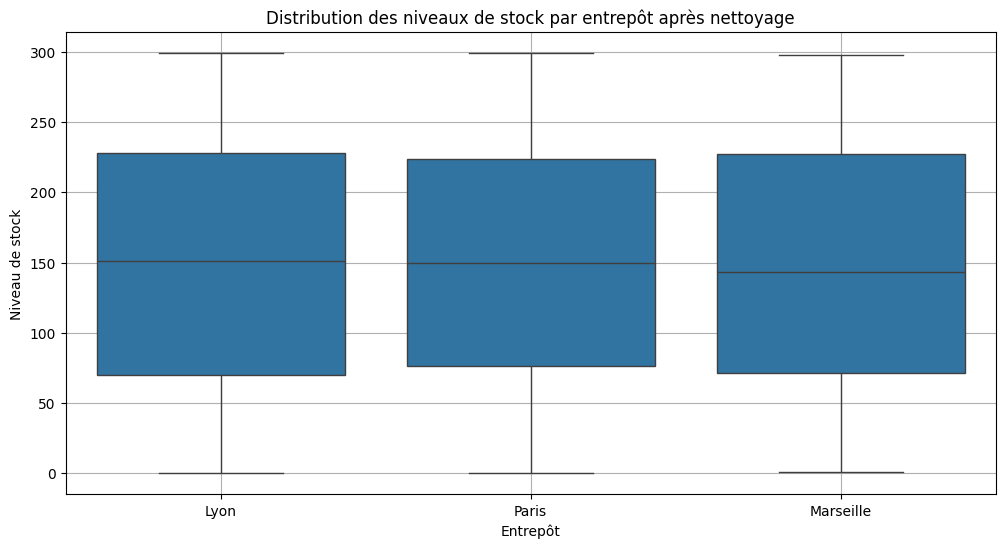

In [24]:
# Distribution des stocks par entrepôt
plt.figure(figsize=(12, 6))
sns.boxplot(x='entrepot', y='niveau_stock', data=df_cleaned)
plt.title('Distribution des niveaux de stock par entrepôt après nettoyage')
plt.xlabel('Entrepôt')
plt.ylabel('Niveau de stock')
plt.grid(True)
plt.show()


Aperçu des données avec la colonne normalisée:
  id_produit entrepot  niveau_stock  niveau_stock_normalise
0     P00001     Lyon            88                0.294314
1     P00001    Paris           141                0.471572
2     P00002     Lyon           286                0.956522
3     P00003    Paris           177                0.591973
4     P00003     Lyon            95                0.317726


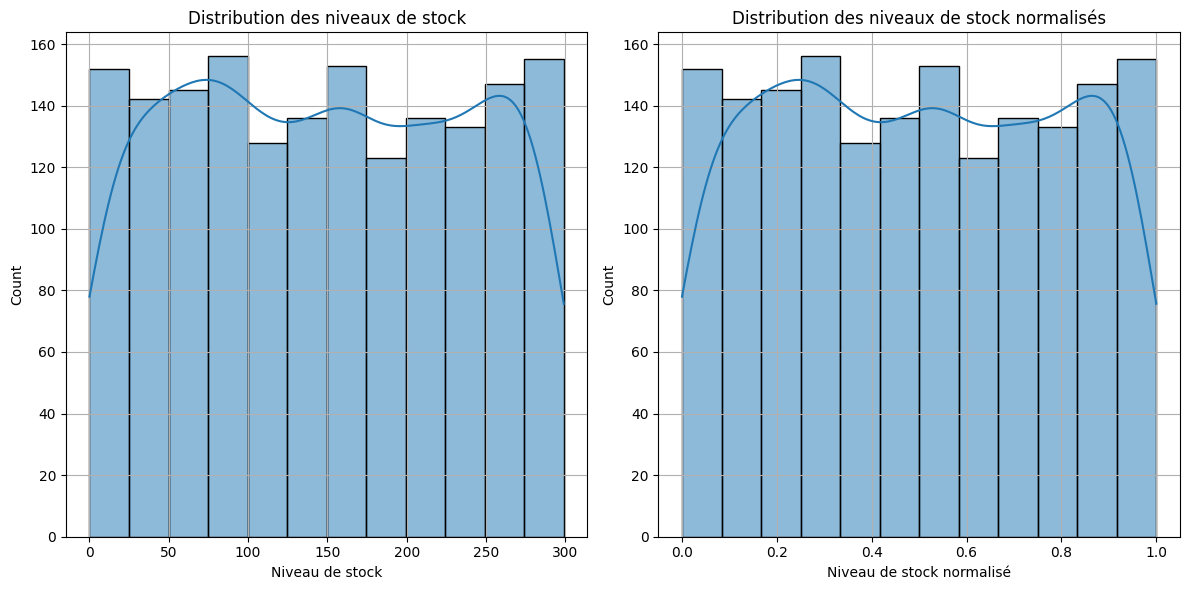

In [25]:
# Normalisation Min-Max des niveaux de stock
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned['niveau_stock_normalise'] = scaler.fit_transform(df_cleaned[['niveau_stock']])

print("Aperçu des données avec la colonne normalisée:")
print(df_cleaned[['id_produit', 'entrepot', 'niveau_stock', 'niveau_stock_normalise']].head())

# Comparaison des distributions avant/après normalisation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['niveau_stock'], kde=True)
plt.title('Distribution des niveaux de stock')
plt.xlabel('Niveau de stock')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['niveau_stock_normalise'], kde=True)
plt.title('Distribution des niveaux de stock normalisés')
plt.xlabel('Niveau de stock normalisé')
plt.grid(True)

plt.tight_layout()
plt.show()
